In [39]:
import pip
pip.main(['install','scikit-learn'])

You are using pip version 8.0.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [31]:
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path="C:\\Users\\rinlin\\Desktop\\DataScience"
print(os.getcwd())
os.chdir(path)
print(os.getcwd())

C:\Users\dsksupport
C:\Users\rinlin\Desktop\DataScience


In [43]:
hr = read_csv('HR_comma_sep.csv')

In [5]:
print(hr[1:5])
print(hr.dtypes)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
1  medium  
2  medium  
3     low  
4     low  
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company        

Hello


Secret Weapon to tune down the churn rate? Make your employee consistently happy with their job!
Satisfication level is negatively correlated with an employee's decision to leave the company. But the latest evaluation does not play an important role. Whether employees feel consistently  content with working in this organisation is key.


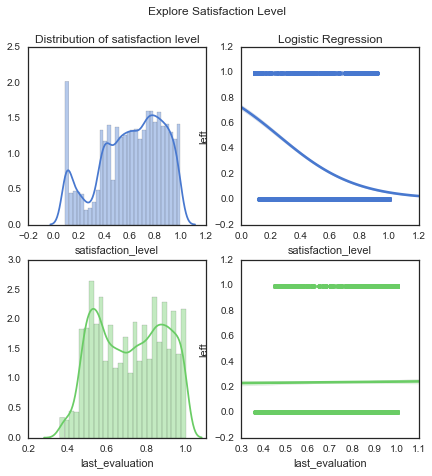

In [167]:
print("Secret Weapon to tune down the churn rate? Make your employee consistently happy with their job!")
sns.set(style="white", palette="muted", color_codes=True)
f,axes = plt.subplots(2,2,figsize=(7,7),sharex=False,sharey=False)
f.suptitle("Explore Satisfaction Level")
sns.distplot(hr['satisfaction_level'],ax=axes[0,0])
axes[0,0].set_title("Distribution of satisfaction level")
sns.regplot(x='satisfaction_level',y='left',logistic=True,data=hr,scatter=True,fit_reg=True,\
            ax=axes[0,1])
axes[0,1].set_title("Logistic Regression",fontsize=12)
sns.distplot(hr['last_evaluation'],ax=axes[1,0],color='g')
sns.regplot(x='last_evaluation',y='left',logistic=True,data=hr,scatter=True,ax=axes[1,1])
print("Satisfication level is negatively correlated with an employee's decision to leave the company. But the latest evaluation\
 does not play an important role. Whether employees feel consistently content with working in this organisation is key.")


Keep your employees' hands busy, not also don't overflood them!
2 projects at the same time might be a piece of cake for most of your employees.Too much time to idle at work drives their minds elsewhere. An employee is mostly like to stay if he/she has about 3 projects at hands. Churn rates start to climb when he/she has more than 4. 100% guaranteed quit if they are tasked with 7 projects!


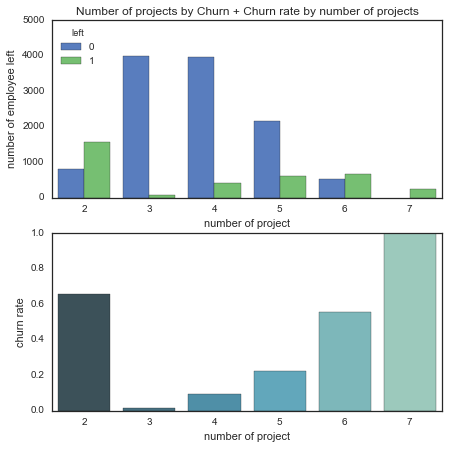

In [171]:
#Number of project
print("Keep your employees' hands busy, not also don't overflood them!")
sns.set(style="white", palette="muted", color_codes=True)
f,axes = plt.subplots(2,1,figsize=(7,7),sharex=False,sharey=False)
sns.barplot(x='number_project',y='left',hue='left',estimator=len,data=hr,ax=axes[0])
axes[0].set_title("Number of projects by Churn + Churn rate by number of projects")
axes[0].set_ylabel("number of employee left")
axes[0].set_xlabel("number of project")
axes[0].set_ylim([0,5000])
ratio_project=hr[['left']].groupby(hr['number_project']).sum().reset_index().merge(hr[['left']].\
             groupby(hr['number_project']).count().reset_index(),on="number_project")
ratio_project=ratio_project.rename(columns={'left_x':'quit','left_y':'total'})
ratio_project['churn rate'] = ratio_project['quit'].apply(float)/ratio_project['total']
sns.barplot(x='number_project',y='churn rate',data=ratio_project,\
            palette=sns.color_palette("GnBu_d"),ax=axes[1])
axes[1].set_ylabel("churn rate")
axes[1].set_xlabel("number of project")
print("2 projects at the same time might be a piece of cake for most of your employees.Too much time to idle at work drives their\
 minds elsewhere. An employee is mostly like to stay if he/she has about 3 projects at hands. Churn rates start to climb when\
 he/she has more than 4. 100% guaranteed quit if they are tasked with 7 projects!")

Again a good insight manifested: Employees don't like idling.Those who decide to take the leave have less monthly working hours as manifested in the distribution.They do also take the leave when they work too long hour.
A small caveat: look out for intersections! A question to ask yourself: Does those who work little hours belong to the same with those work long hours when it comes to deciding to leave?


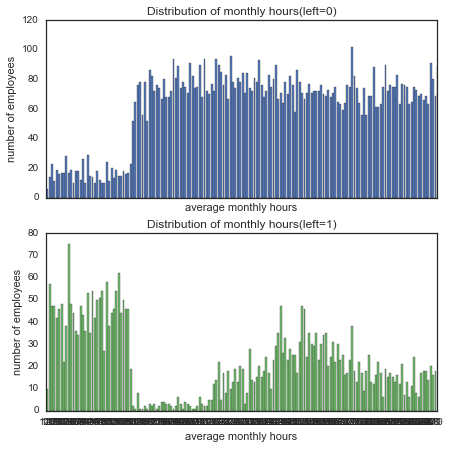

In [174]:
#Explore average monthly hours
f,axes = plt.subplots(2,1,figsize=(7,7),sharex=True,sharey=False)
sns.barplot(x='average_montly_hours',y='left',estimator=len,data=hr[hr['left']==0],ax=axes[0],color='b')
axes[0].set_title('Distribution of monthly hours(left=0)')
axes[0].set_ylabel('number of employees')
axes[0].set_xlabel('average monthly hours')
sns.barplot(x='average_montly_hours',y='left',estimator=len,data=hr[hr['left']==1],ax=axes[1],color='g')
axes[1].set_title('Distribution of monthly hours(left=1)')
axes[1].set_ylabel('number of employees')
axes[1].set_xlabel('average monthly hours')
print("Again a good insight manifested: Employees don't like idling.Those who decide to take the leave have less monthly working \
hours as manifested in the distribution.They do also take the leave when they work too long hour.")
print("A small caveat: look out for intersections! A question to ask yourself: Does those who work little hours belong to the \
same with those work long hours when it comes to deciding to leave?")

Employees are more likely to quit at 4th, 5th years. Which can pose a threat to the organization as they are losing experienced talents.Churn rate starts to decline after 6th - is it because after 6th, employees are promoted to managirial position with greater decision power that in return reward them to stay?


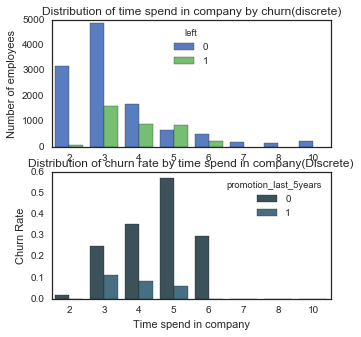

In [192]:
f,axes = plt.subplots(2,1,figsize=(5,5),sharex=False,sharey=False)
sns.barplot(x='time_spend_company',y='left',hue='left',estimator=len,data=hr,ax=axes[0])
axes[0].set_title('Distribution of time spend in company by churn(discrete)')
axes[0].set_ylabel('Number of employees')
axes[0].set_xlabel('')
ratio_time=hr[['left']].groupby([hr['time_spend_company'],hr['promotion_last_5years']]).sum().reset_index().merge(hr[['left']]\
.groupby([hr['time_spend_company'],hr['promotion_last_5years']]).count().reset_index(),on=["time_spend_company",\
'promotion_last_5years']).rename(columns={'left_x':'quit','left_y':'total'})
ratio_time['churn rate'] = ratio_time['quit'].apply(float)/ratio_time['total']
sns.barplot(x='time_spend_company',y='churn rate',hue='promotion_last_5years',data=ratio_time,palette=sns.\
            color_palette("GnBu_d"),ax=axes[1])
axes[1].set_title('Distribution of churn rate by time spend in company(Discrete)')
axes[1].set_ylabel('Churn Rate')
axes[1].set_xlabel('Time spend in company')
print("Employees are more likely to quit at 4th, 5th years. Which can pose a threat to the organization as they are losing\
 experienced talents.Churn rate starts to decline after 6th - is it because after 6th, employees are promoted to managirial\
 position with greater decision power that in return reward them to stay?")

if an employee work long enough and is promoted, he/she is very likely to stay in the company. Otherwise - if he/she feels that his/her career is stagnant - staying in the campany but is not rewarded with promotions - they are likely to leave.Also note: when the employee stays less than 1 year - they are more proned to jump if promoted.


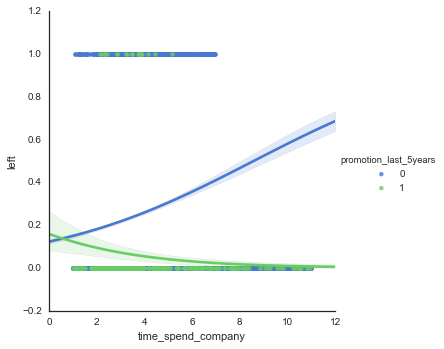

In [195]:
print(sns.lmplot(x='time_spend_company',y='left',hue='promotion_last_5years',x_jitter=True,logistic=True,data=hr))
print("if an employee work long enough and is promoted, he/she is very likely to stay in the company. Otherwise - if he/she \
feels that his/her career is stagnant - staying in the campany but is not rewarded with promotions - they are likely to leave.\
Also note: when the employee stays less than 1 year - they are more proned to jump if promoted.")

Employees who have had work accident are less likely to quit.


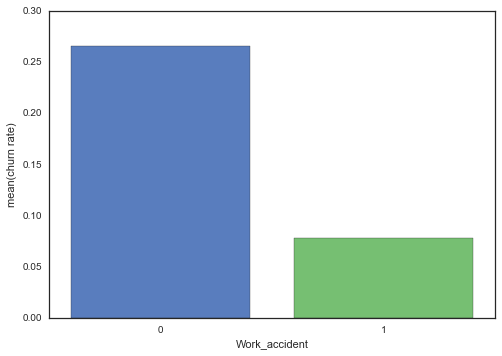

In [198]:
#Study the churn rate by work accident
ratio_accid=hr[['left']].groupby(hr['Work_accident']).sum().reset_index().merge(hr[['left']].\
             groupby(hr['Work_accident']).count().reset_index(),on="Work_accident")
ratio_accid=ratio_accid.rename(columns={'left_x':'quit','left_y':'total'})
ratio_accid['churn rate'] = ratio_accid['quit'].apply(float)/ratio_accid['total']
sns.barplot(x='Work_accident',y='churn rate',data=ratio_accid)
print("Employees who have had work accident are less likely to quit.")

if employee is not promoted in the last five years, he/she is almost 5 times more likely to quit.


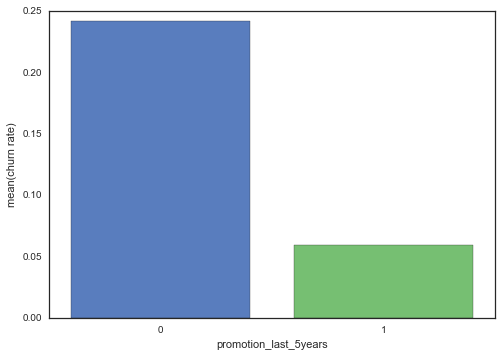

In [199]:
ratio_promo=hr[['left']].groupby(hr['promotion_last_5years']).sum().reset_index().merge(hr[['left']].\
             groupby(hr['promotion_last_5years']).count().reset_index(),on="promotion_last_5years")
ratio_promo=ratio_promo.rename(columns={'left_x':'quit','left_y':'total'})
ratio_promo['churn rate'] = ratio_promo['quit'].apply(float)/ratio_promo['total']
sns.barplot(x='promotion_last_5years',y='churn rate',data=ratio_promo)
print("if employee is not promoted in the last five years, he/she is almost 5 times more likely to quit.") 

Watch out for your account and HR people!


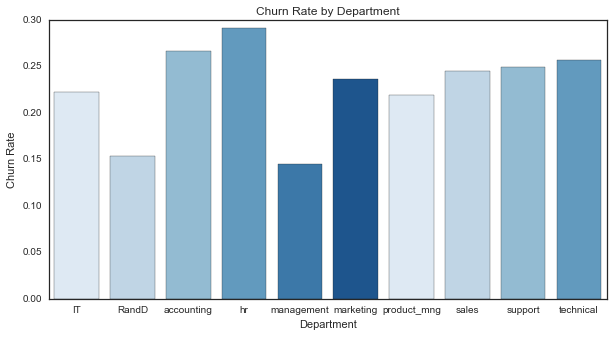

In [182]:
#Study the churn rate by department
print("Watch out for your account and HR people!")
f,axes = plt.subplots(1,1,figsize=(10,5),sharex=False,sharey=False)
ratio_salary=hr[['left']].groupby(hr['sales']).sum().reset_index().merge(hr[['left']].\
             groupby(hr['sales']).count().reset_index(),on="sales")
ratio_salary=ratio_salary.rename(columns={'left_x':'quit','left_y':'total'})
ratio_salary['churn rate'] = ratio_salary['quit'].apply(float)/ratio_salary['total']
sns.barplot(x='sales',y='churn rate',data=ratio_salary,palette=sns.color_palette("Blues"))
axes.set_title("Churn Rate by Department")
axes.set_ylabel("Churn Rate")
axes.set_xlabel("Department")

Money is king.
Salary positively correlates with churns. The higher the salary, the less likely an employee is to churn. Note that the churn rate drops astronically after the salary bucket elevates to high.


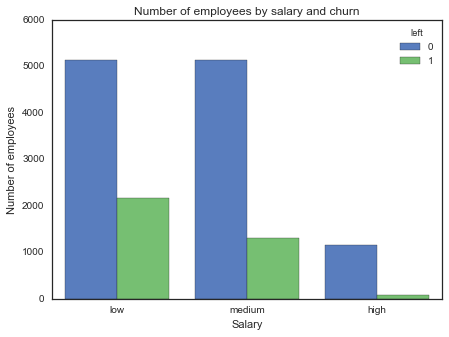

In [173]:
print("Money is king.")
f,axes = plt.subplots(1,1,figsize=(7,5),sharex=False,sharey=False)
sns.barplot(x='salary',y='left',hue='left',estimator=len,data=hr)
axes.set_title("Number of employees by salary and churn")
axes.set_ylabel("Number of employees")
axes.set_xlabel("Salary")
print("Salary positively correlates with churns. The higher the salary, the less likely an employee is to churn. Note that the \
churn rate drops astronically after the salary bucket elevates to high.")

In [207]:
print("The initial Data analytics and visualization helps us get an intuitive on how different factors influence \
an employee's decision to stay/leave.")
print("Consistent high satisfaction level, Balanced working pace, Prompt promotion as well as financial rewarding are all\
 keys to keep talents. Which in terms provides us with a clearer lens in tuning our data analytics approach.")

The initial Data analytics and visualization helps us get an intuitive on how different factors influence an employee's decision to stay/leave.
Consistent high satisfaction level, Balanced working pace, Prompt promotion as well as financial rewarding are all keys to keep talents. Which in terms provides us with a clearer lens in tuning our data analytics approach.
